In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest.csv').set_index('Unnamed: 0')

In [3]:
#Gridsearch cross validation

KfoldCV = KFold(n_splits=10)
parameters = {'n_estimators':[10, 50,100,150],
              'criterion':['gini','entropy']
}

model = RandomForestClassifier()
cv = GridSearchCV(model, param_grid=parameters, cv=KfoldCV)

In [4]:
%%time
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 1min 34s, sys: 289 ms, total: 1min 34s
Wall time: 1min 34s


{'criterion': 'entropy', 'n_estimators': 150}

In [7]:
%%time
model.set_params(**cv.best_params_)
model.fit(X_train,y_train)
pred = model.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted') # which average to use??
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.35989617809628394, recall: 0.3258145363408521, f1score: 0.3393476785102547
CPU times: user 3.29 s, sys: 14.5 ms, total: 3.3 s
Wall time: 3.31 s


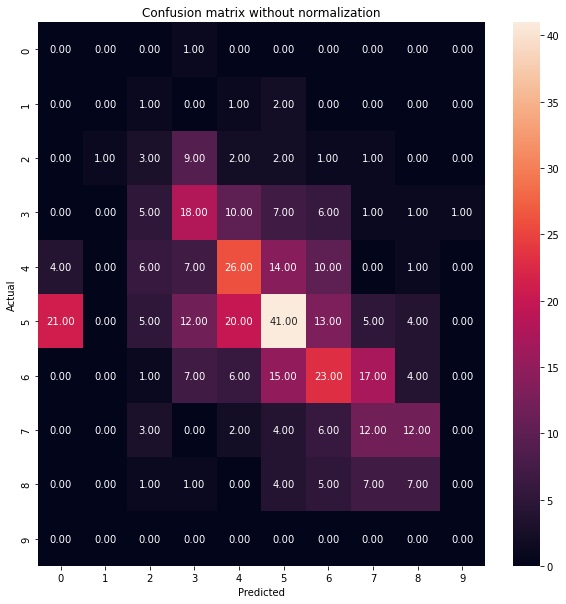

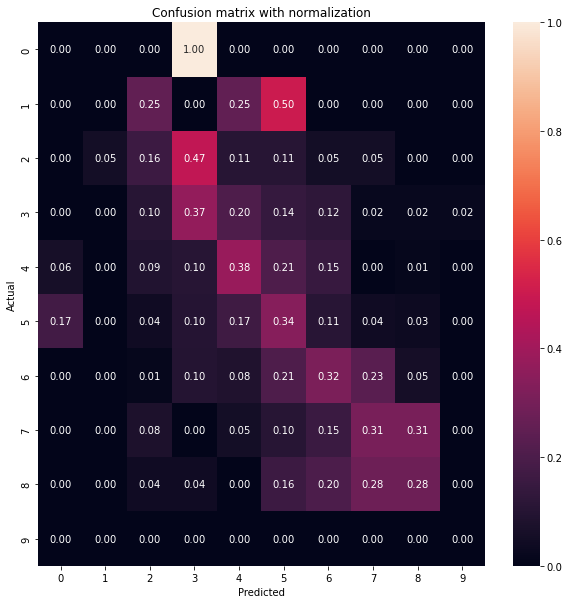

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [13]:
df = pd.DataFrame(pred)
print(len(df[df[0]==0]))
df[df[0]==0]

25


,0
117,0.0
122,0.0
123,0.0
128,0.0
129,0.0
130,0.0
131,0.0
132,0.0
133,0.0
134,0.0


<AxesSubplot:>

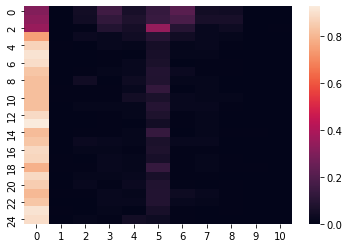

In [24]:
a = X_test.iloc[df[df[0]==0].index,:]

model.predict(a)
sns.heatmap(model.predict_proba(a))

In [29]:
pd.DataFrame(model.predict_proba(a))

,0,1,2,3,4,5,6,7,8,9,10
0,0.306667,0.000000,0.046667,0.153333,0.060000,0.133333,0.213333,0.046667,0.040000,0.000000,0.000000
1,0.326667,0.000000,0.040000,0.120000,0.073333,0.140000,0.180000,0.060000,0.060000,0.000000,0.000000
2,0.353333,0.000000,0.006667,0.086667,0.053333,0.346667,0.093333,0.020000,0.033333,0.000000,0.006667
3,0.746667,0.000000,0.026667,0.020000,0.040000,0.093333,0.040000,0.020000,0.013333,0.000000,0.000000
4,0.866667,0.006667,0.000000,0.020000,0.013333,0.053333,0.013333,0.020000,0.006667,0.000000,0.000000
5,0.906667,0.000000,0.000000,0.006667,0.000000,0.060000,0.013333,0.013333,0.000000,0.000000,0.000000
6,0.893333,0.000000,0.000000,0.006667,0.020000,0.066667,0.000000,0.006667,0.006667,0.000000,0.000000
7,0.833333,0.000000,0.006667,0.013333,0.020000,0.086667,0.026667,0.006667,0.006667,0.000000,0.000000
8,0.820000,0.000000,0.040000,0.000000,0.033333,0.080000,0.013333,0.013333,0.000000,0.000000,0.000000
9,0.820000,0.006667,0.006667,0.006667,0.020000,0.126667,0.000000,0.013333,0.000000,0.000000,0.000000


In [30]:
a

,calories,distance,l_act,m_act,resting_heart,sedentary,sleep_overall_score,sleep_composition_score,sleep_revitalization_score,sleep_duration_score,...,age,height,gender,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
117,0.002189,0.000000,0.000000,0.000,0.515375,0.998136,0.660000,0.650216,0.763370,0.577489,...,0.324324,0.40625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
122,0.057449,0.043205,0.071429,0.000,0.435791,0.973905,0.653333,0.650216,0.763370,0.577489,...,0.324324,0.40625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
123,0.313342,0.318951,0.271978,0.176,0.356023,0.850885,0.486667,0.650216,0.763370,0.577489,...,0.324324,0.40625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
128,0.384108,0.142291,0.398352,0.080,0.857408,0.356011,0.000000,0.000000,0.000000,0.545455,...,0.324324,0.40625,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129,0.519004,0.379903,0.445055,0.632,1.000000,0.391426,0.333333,0.545455,0.153846,0.636364,...,0.324324,0.40625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
130,0.582217,0.369506,0.769231,0.168,0.898254,0.359739,0.566667,0.545455,0.692308,0.636364,...,0.324324,0.40625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131,0.550058,0.380850,0.675824,0.312,0.726443,0.154706,0.800000,0.454545,0.769231,0.954545,...,0.324324,0.40625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132,0.469523,0.251871,0.456044,0.328,0.810320,0.286114,0.933333,0.727273,0.846154,0.954545,...,0.324324,0.40625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
133,0.496364,0.268453,0.620879,0.128,0.788687,0.390494,0.433333,0.272727,0.769231,0.545455,...,0.324324,0.40625,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=790987083),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1147567423),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1393923902),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=310770303),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1419392134),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1244805915),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=1208991324),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        random_state=83964271),
 DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
          

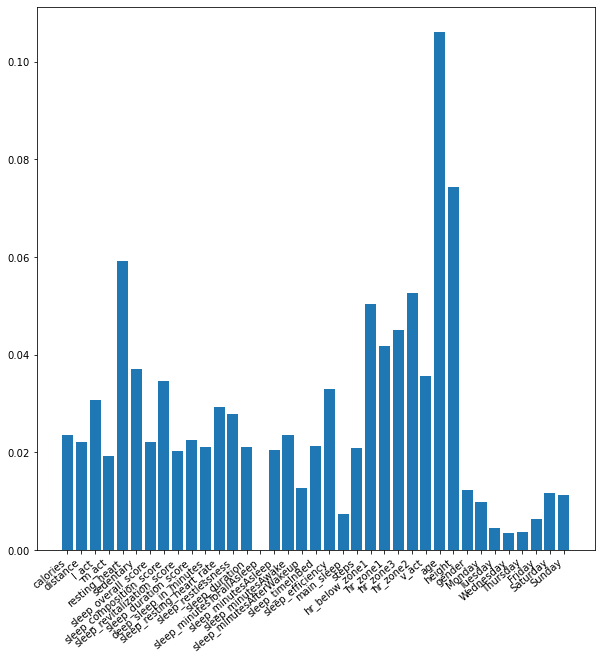

In [48]:
importance = model.feature_importances_

fig = plt.figure(figsize=(10,10))
plt.bar(X_test.columns, importance)
plt.xticks(rotation=40, ha = 'right')
plt.show()